In [1]:
library(ggplot2, lib.loc = '/home/ryan/anaconda2/lib/R/library/')

In [2]:
options(jupyter.plot_mimetypes = "image/png") 
options(repr.plot.width = 6, repr.plot.height = 4)

In [3]:
read_pca_output <- function(path){
    pca_df = read.table(path)
    names(pca_df) = c('Population', 'Individual', 'PC1', 'PC2', 'PC3')
    return(pca_df)
}

In [4]:
plot_pca <- function(pca_df){
    p = ggplot(data = pca_df, aes(x = PC1, y = PC2))
    p = p + geom_point(aes(colour = Population))
    p = p + theme_classic()
    return(p)
}

In [5]:
pca_clean = read_pca_output('./work/pink_salmon.clean.eigenvec')
head(pca_clean)

Population,Individual,PC1,PC2,PC3
Koppen_ODD,PKOPE91T_0001,0.0760941,0.0718730,-0.162637
Koppen_ODD,PKOPE91T_0002,0.0645985,0.0767855,-0.116444
Koppen_ODD,PKOPE91T_0003,0.0651159,0.0838957,-0.145777
Koppen_ODD,PKOPE91T_0005,0.0772838,0.0734808,-0.163693
Koppen_ODD,PKOPE91T_0006,0.0621168,0.0808092,-0.115456
Koppen_ODD,PKOPE91T_0007,0.0759293,0.0626536,-0.159901


In [6]:
pca_initial = read_pca_output('./work/pink_data.initial.eigenvec')
head(pca_initial)

Population,Individual,PC1,PC2,PC3
Koppen_ODD,PKOPE91T_0001,0.0770852,0.0375533,-0.0849079
Koppen_ODD,PKOPE91T_0002,0.0727659,0.0437898,-0.0836947
Koppen_ODD,PKOPE91T_0003,0.0721333,0.0472651,-0.0766823
Koppen_ODD,PKOPE91T_0005,0.0796144,0.0385504,-0.0955947
Koppen_ODD,PKOPE91T_0006,0.0747576,0.0527238,-0.0945602
Koppen_ODD,PKOPE91T_0007,0.0773968,0.0351270,-0.0966690


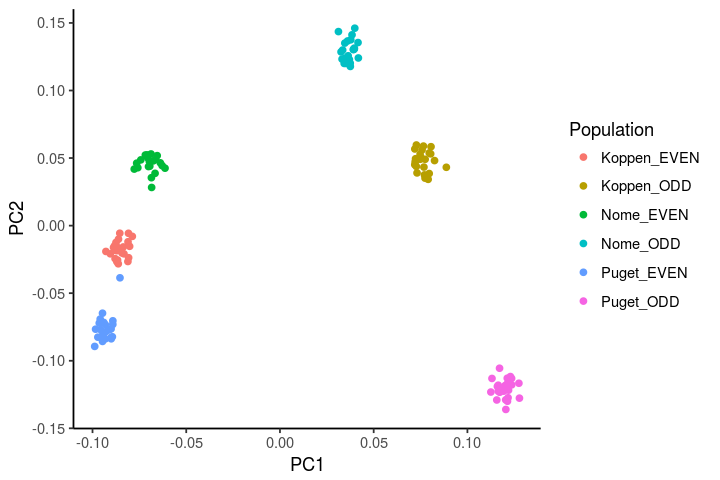

In [7]:
plot_pca(pca_initial)

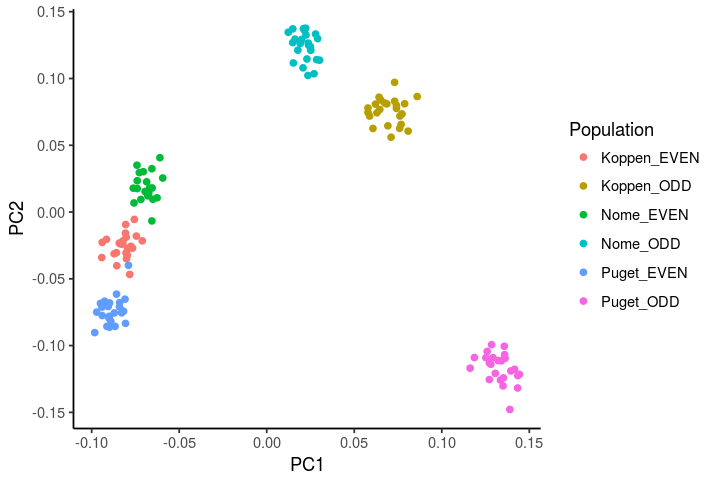

In [8]:
plot_pca(pca_clean)